Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514 / EEL7513 / EEL410250 - Aprendizado de Máquina
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bU}{\mathbf{U}}$
$\newcommand{\bu}{\mathbf{u}}$
$\newcommand{\bT}{\mathbf{T}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 8: Redes Convolucionais

Neste exercício você irá utilizar redes convolucionais para reconhecimento de imagens. Além de treinar uma rede a partir do zero, você irá investigar a técnica de ajuste fino (*fine tuning*) a partir de uma rede pré-treinada (*transfer learning*).


In [1]:
import numpy as np #s devs = tf.python.client.device_lib.list_local_devices()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import sys
import tensorflow as tf
print('Python', sys.version.split(' ')[0])
print('TensorFlow', tf.__version__)


Python 3.6.9
TensorFlow 2.4.1


In [2]:
def plots(history):
  plt.figure(figsize=(14,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], '.-', label='Train loss')
  if 'val_loss' in history.history.keys():
    plt.plot(history.history['val_loss'], '.-', label='Val loss')
  plt.xlabel('Epochs');
  plt.legend();
  plt.grid();
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], '.-', label='Train accuracy')
  plt.xlabel('Epochs');
  if 'val_accuracy' in history.history.keys():
    plt.plot(history.history['val_accuracy'], '.-', label='Val accuracy')
  plt.legend();
  plt.grid();

In [31]:
import tensorflow.keras.backend as K
import random

def reset_seed():
   np.random.seed(1)
   random.seed(2)
   tf.random.set_seed(3)


# 1. Treinando a partir do zero

## MNIST

1. Assim como no exercício anterior, carregue o conjunto MNIST e separe as últimas 5000 imagens como conjunto de validação. No entanto, desta vez não realize qualquer pré-processamento nas imagens (como escalonamento); isto será feito [internamente no modelo](https://keras.io/guides/preprocessing_layers/#preprocessing-data-before-the-model-or-inside-the-model) depois.

# ~~ Resposta - Exercício 8.1.1 --

In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
(x_val,y_val) = (x_train[-5000:], y_train[-5000:])
(x_train,y_train) = (x_train[:-5000],y_train[:-5000])


print("Train shapes - X: ",x_train.shape," | y: ",y_train.shape)
print("Val shapes - X: ",x_val.shape," | y: ",y_val.shape)
print("Test shapes - X: ",x_test.shape," | y: ",y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train shapes - X:  (55000, 28, 28)  | y:  (55000,)
Val shapes - X:  (5000, 28, 28)  | y:  (5000,)
Test shapes - X:  (10000, 28, 28)  | y:  (10000,)


2. Usando o Keras, construa uma rede neural com pelo menos uma camada convolucional (`tf.keras.layers.Conv2D`) e confirme que não há nenhum erro de definição. Organize seu código em uma função de criação do modelo, conforme o exemplo abaixo (dê o nome que preferir). Utilize camadas de escalonamento e *reshape* conforme necessário.

#### Dicas
- Funções úteis: `tf.keras.layers.experimental.preprocessing.Rescaling`, `tf.keras.layers.Reshape`
- Camadas convolucionais 2D exigem que a entrada seja um tensor 3D, sendo o último eixo correspondente ao número de canais (no caso, apenas 1, para uma imagem em tons de cinza).

# ~~ Resposta - Exercício 8.1.2 --

In [4]:
# -------------- 8.1.2
from tensorflow.keras import layers,Sequential,Input

np.random.seed(42)
def make_model2():
  model = Sequential(
      [
       Input(shape=(28, 28,1)),
       layers.experimental.preprocessing.Rescaling(1.0/255),
       layers.Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
       layers.Flatten(),

       layers.Dropout(0.5),
       layers.Dense(10,activation = 'softmax'),
      ]
  )
  return model
make_model2().summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dropout (Dropout)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________


In [5]:
# -------------- 8.1.2

model_2=1
del model
K.clear_session()
reset_seed()

#---- Treinando modelo ----
model_2= make_model2()

opt = tf.keras.optimizers.Adam(learning_rate=0.00006)

#Compila o modelo
model_2.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history = model_2.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=128)

Epoch 1/10
430/430 [==============================] - 9s 5ms/step - loss: 1.6334 - accuracy: 0.6448 - val_loss: 0.4297 - val_accuracy: 0.9124
Epoch 2/10
430/430 [==============================] - 2s 4ms/step - loss: 0.4650 - accuracy: 0.8829 - val_loss: 0.2784 - val_accuracy: 0.9268
Epoch 3/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3490 - accuracy: 0.9016 - val_loss: 0.2374 - val_accuracy: 0.9376
Epoch 4/10
430/430 [==============================] - 2s 4ms/step - loss: 0.3036 - accuracy: 0.9136 - val_loss: 0.2177 - val_accuracy: 0.9394
Epoch 5/10
430/430 [==============================] - 2s 4ms/step - loss: 0.2772 - accuracy: 0.9212 - val_loss: 0.1996 - val_accuracy: 0.9468
Epoch 6/10
430/430 [==============================] - 2s 4ms/step - loss: 0.2555 - accuracy: 0.9264 - val_loss: 0.1878 - val_accuracy: 0.9478
Epoch 7/10
430/430 [==============================] - 2s 4ms/step - loss: 0.2406 - accuracy: 0.9313 - val_loss: 0.1760 - val_accuracy: 0.9536
Epoch 

3. Desenvolva (i.e., aprimore a arquitetura) e treine sua rede (a partir do zero), tentando conseguir uma acurácia de validação de pelo menos 99.2%. (Lembre que usando apenas camadas densas é difícil conseguir uma acurácia muito superior a 98%.) Em seguida, calcule a acurácia no conjunto de teste.

1. (OPCIONAL) Por que o uso de Dropout faz com que o desempenho de treinamento comece bastante inferior ao de validação?

#### Dicas
- Parta da arquitetura deste [tutorial](https://keras.io/examples/vision/mnist_convnet) (com os devidos ajustes feitos no item anterior) e adicione uma camada densa com um número suficiente de unidades. Lembre-se de (ao contrário do tutorial) trazer para dentro do modelo qualquer pré-processamento necessário.
- Visualize os gráficos do treinamento usando a função `plots` fornecida (ou a ferramenta TensorBoard).
- Ao usar camadas convolucionais com GPU, a execução paralelizada torna impossível garantir a reproducibilidade, portanto, não perca tempo com isso.

# ~~ Resposta - Exercício 8.1.3 --

In [6]:
# -------------- 8.1.3
import tensorflow as tf
from tensorflow.keras import layers,Sequential,Input

np.random.seed(42)
def make_model3():
  model = Sequential(
      [
       Input(shape=(28, 28,1)),
       layers.experimental.preprocessing.Rescaling(1.0/255),
       layers.BatchNormalization(),
       

       layers.Conv2D(32,kernel_size=(3,3),activation = 'relu', padding = 'same'),
       layers.Dense(128,activation = 'relu'),
       layers.BatchNormalization(),

       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Conv2D(64,kernel_size=(3,3),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),

       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Flatten(),

       layers.Dense(128,activation = 'relu'),
       layers.BatchNormalization(),
       layers.Dropout(0.5),
      
       layers.Dense(10,activation = 'softmax'),
      ]
  )
  return model
make_model3().summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dense_2 (Dense)              (None, 28, 28, 128)       4224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [7]:
# -------------- 8.1.3

model_3=1
del model
K.clear_session()
reset_seed()

#---- Treinando modelo  3 ----
model_3= make_model3()

opt = tf.keras.optimizers.Adam(learning_rate=0.00013)

#Compila o modelo
model_3.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history = model_3.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=128)

Epoch 1/10
430/430 [==============================] - 7s 15ms/step - loss: 0.6687 - accuracy: 0.7949 - val_loss: 0.6344 - val_accuracy: 0.7924
Epoch 2/10
430/430 [==============================] - 6s 14ms/step - loss: 0.1158 - accuracy: 0.9666 - val_loss: 0.0528 - val_accuracy: 0.9862
Epoch 3/10
430/430 [==============================] - 6s 14ms/step - loss: 0.0786 - accuracy: 0.9786 - val_loss: 0.0413 - val_accuracy: 0.9892
Epoch 4/10
430/430 [==============================] - 6s 14ms/step - loss: 0.0569 - accuracy: 0.9836 - val_loss: 0.0379 - val_accuracy: 0.9906
Epoch 5/10
430/430 [==============================] - 6s 14ms/step - loss: 0.0483 - accuracy: 0.9865 - val_loss: 0.0352 - val_accuracy: 0.9904
Epoch 6/10
430/430 [==============================] - 6s 14ms/step - loss: 0.0417 - accuracy: 0.9882 - val_loss: 0.0346 - val_accuracy: 0.9906
Epoch 7/10
430/430 [==============================] - 6s 14ms/step - loss: 0.0328 - accuracy: 0.9905 - val_loss: 0.0327 - val_accuracy: 0.9918

In [8]:
# model 3 - conjunto de teste
test_score,test_acc = model_3.evaluate(x_test,y_test,batch_size=10)

print("Test accuracy: {:2%}".format(test_acc))

1000/1000 [==============================] - 2s 2ms/step - loss: 0.0283 - accuracy: 0.9900
Test accuracy: 99.000001%


# ~~ Resposta - Exercício 8.1.4 --
O desempenho de treinamento  começa com um valor inferior pois o Dropout atua apenas no conjunto de treinamento, ou seja, o efeito de apagar a influência de alguns neurônios afeta o conjunto de treino mas não o de validação, pois já na validação todos os neurônios são utilizados .

## (OPCIONAL) Fashion-MNIST

5. (OPCIONAL) Repita para o conjunto [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), o qual também está [disponível no Keras](https://keras.io/api/datasets/fashion_mnist). Nesse caso, é suficiente aproveitar a mesma arquitetura do modelo e apenas (se necessário) alterar a taxa de aprendizado e o número de épocas. Sem muito esforço é possível conseguir uma acurácia de validação de 92% (em comparação com 87% para uma rede densa). Se desejar, visualize algumas imagens do conjunto de treinamento e algumas predições erradas no conjunto de teste.

# ~~ Resposta - Exercício 8.1.5 --

In [9]:
#Carregando fashion_mnist

from tensorflow.keras.datasets import fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
(x_val,y_val) = (x_train[-5000:], y_train[-5000:])
(x_train,y_train) = (x_train[:-5000],y_train[:-5000])


print("Train shapes - X: ",x_train.shape," | y: ",y_train.shape)
print("Val shapes - X: ",x_val.shape," | y: ",y_val.shape)
print("Test shapes - X: ",x_test.shape," | y: ",y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
Train shapes - X:  (55000, 28, 28)  | y:  (55000,)
Val shapes - X:  (5000, 28, 28)  | y:  (5000,)
Test shapes - X:  (10000, 28, 28)  | y:  (10000,)


In [10]:
# -------------- 8.1.5

model_5=1
del model
K.clear_session()
reset_seed()

#---- Treinando modelo  5 ----
model_5= make_model3()

opt = tf.keras.optimizers.Adam(learning_rate=0.00017)
  
#Compila o modelo
model_5.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history = model_5.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=128)

Epoch 1/10
430/430 [==============================] - 7s 15ms/step - loss: 0.7918 - accuracy: 0.7401 - val_loss: 0.8143 - val_accuracy: 0.7490
Epoch 2/10
430/430 [==============================] - 6s 14ms/step - loss: 0.3710 - accuracy: 0.8697 - val_loss: 0.2886 - val_accuracy: 0.8940
Epoch 3/10
430/430 [==============================] - 6s 14ms/step - loss: 0.3077 - accuracy: 0.8921 - val_loss: 0.2477 - val_accuracy: 0.9086
Epoch 4/10
430/430 [==============================] - 6s 14ms/step - loss: 0.2693 - accuracy: 0.9046 - val_loss: 0.2661 - val_accuracy: 0.9026
Epoch 5/10
430/430 [==============================] - 6s 14ms/step - loss: 0.2476 - accuracy: 0.9121 - val_loss: 0.2274 - val_accuracy: 0.9154
Epoch 6/10
430/430 [==============================] - 6s 14ms/step - loss: 0.2194 - accuracy: 0.9217 - val_loss: 0.2425 - val_accuracy: 0.9096
Epoch 7/10
430/430 [==============================] - 6s 15ms/step - loss: 0.2016 - accuracy: 0.9285 - val_loss: 0.2323 - val_accuracy: 0.9144

## CIFAR-10

Agora, vamos utilizar um conjunto um pouco mais complexo, o [CIFAR-10](https://en.wikipedia.org/wiki/CIFAR-10), também [disponível no Keras](https://keras.io/datasets/).


In [11]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train.dtype:', x_train.dtype)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.dtype: uint8
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


Observe que o `shape` do array `y` precisa ser corrigido:
- Para usar a perda `sparse_categorical_crossentropy`, `y` precisa ser um tensor 1D com valores em `[0, 1, ..., n_classes-1]`
- Para usar a perda `categorical_crossentropy`, `y` precisa ser um tensor 2D com *shape* `(n_samples, n_classes)` e codificação *one-hot*


In [12]:
from sklearn.model_selection import train_test_split
# Make sure y is a 1D tensor, so we can use sparse_categorical_crossentropy loss
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=5000, shuffle=False)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(45000, 32, 32, 3) (45000,)
(5000, 32, 32, 3) (5000,)
(10000, 32, 32, 3) (10000,)


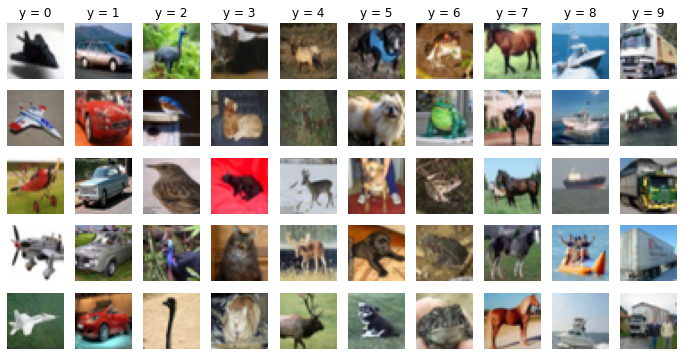

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for i in range(5):
  for c in range(10):
    plt.subplot(5, 10, 10*i+c+1)
    img = x_train[y_train == c][i]
    plt.imshow(img)
    if i == 0:
      plt.title('y = {}'.format(c))
    plt.axis('off')

6. Inicialmente, apenas converta a mesma arquitetura utilizada no MNIST para o formato das imagens do CIFAR-10 e treine o modelo. Note que agora não é mais necessário usar uma camada `Reshape`. Certifique-se de escolher um batch size e taxa de aprendizado apropriadas. Observe que é difícil obter uma acurácia de validação superior a 73%.

7. Por que você acha que isso acontece? Explique.

# ~~ Resposta - Exercício 8.1.6 --

In [14]:
'''
# -------------- 8.1.6
import tensorflow as tf
from tensorflow.keras import layers,Sequential,Input

def make_model6():
  model = Sequential(
      [
       Input(shape=(32, 32,3)),
       layers.experimental.preprocessing.Rescaling(1.0/255),

       layers.Conv2D(256,kernel_size=(5,5),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Conv2D(64,kernel_size=(5,5),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,
       
       layers.Conv2D(128,kernel_size=(5,5),activation = 'relu', padding = 'same'), ##add depois
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Flatten(),

       layers.Dense(128,activation = 'relu'),
       layers.BatchNormalization(),
       layers.Dropout(0.4),
      
       layers.Dense(10,activation = 'softmax'),
      ]
  )
  return model
make_model6().summary()

'''

"\n# -------------- 8.1.6\nimport tensorflow as tf\nfrom tensorflow.keras import layers,Sequential,Input\n\ndef make_model6():\n  model = Sequential(\n      [\n       Input(shape=(32, 32,3)),\n       layers.experimental.preprocessing.Rescaling(1.0/255),\n\n       layers.Conv2D(256,kernel_size=(5,5),activation = 'relu', padding = 'same'),\n       layers.BatchNormalization(),\n       layers.MaxPooling2D(pool_size=(2,2)) ,\n\n       layers.Conv2D(64,kernel_size=(5,5),activation = 'relu', padding = 'same'),\n       layers.BatchNormalization(),\n       layers.MaxPooling2D(pool_size=(2,2)) ,\n       \n       layers.Conv2D(128,kernel_size=(5,5),activation = 'relu', padding = 'same'), ##add depois\n       layers.BatchNormalization(),\n       layers.MaxPooling2D(pool_size=(2,2)) ,\n\n       layers.Flatten(),\n\n       layers.Dense(128,activation = 'relu'),\n       layers.BatchNormalization(),\n       layers.Dropout(0.4),\n      \n       layers.Dense(10,activation = 'softmax'),\n      ]\n  )\n  

In [15]:
# -------------- 8.1.6 _2 (antigo model 3 - editando) 
import tensorflow as tf
from tensorflow.keras import layers,Sequential,Input
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.models import load_model

def make_model6():
  np.random.seed(42)
  model = Sequential(
      [
       Input(shape=(32, 32,3)),
       layers.experimental.preprocessing.Rescaling(1.0/255),

       layers.Conv2D(256,kernel_size=(5,5),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,
       
       layers.Conv2D(64,kernel_size=(5,5),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Conv2D(128,kernel_size=(5,5),activation = 'relu', padding = 'same'), ##add depois
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Flatten(),
# -----------------
       layers.Dense(128,activation = 'relu'),
       layers.BatchNormalization(),
       layers.Dropout(0.4),
      
       layers.Dense(10,activation = 'softmax'),
      ]
  )
  return model
make_model6().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 256)       19456     
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        409664    
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [16]:
# -------------- 8.1.6

model_6=1
del model
K.clear_session()
reset_seed()

#---- Treinando modelo  6 ----
model_6= make_model6()

opt = tf.keras.optimizers.Adam(learning_rate=0.00008)
#es = EarlyStopping(monitor = 'val_accuracy',mode = 'min',verbose = 1, patience = 100)
#mc = ModelCheckpoint('best_model.h5',monitor='val_accuracy',mode = 'max',verbose = 0,save_best_only = True)

#Compila o modelo
model_6.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history = model_6.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=15,batch_size=128)

Epoch 1/15
352/352 [==============================] - 10s 27ms/step - loss: 2.2021 - accuracy: 0.3171 - val_loss: 3.3527 - val_accuracy: 0.1246
Epoch 2/15
352/352 [==============================] - 9s 26ms/step - loss: 1.4507 - accuracy: 0.5054 - val_loss: 1.2110 - val_accuracy: 0.5728
Epoch 3/15
352/352 [==============================] - 9s 26ms/step - loss: 1.2278 - accuracy: 0.5743 - val_loss: 1.3254 - val_accuracy: 0.5438
Epoch 4/15
352/352 [==============================] - 9s 26ms/step - loss: 1.0799 - accuracy: 0.6238 - val_loss: 1.0323 - val_accuracy: 0.6434
Epoch 5/15
352/352 [==============================] - 9s 26ms/step - loss: 0.9681 - accuracy: 0.6603 - val_loss: 1.0124 - val_accuracy: 0.6560
Epoch 6/15
352/352 [==============================] - 9s 26ms/step - loss: 0.8793 - accuracy: 0.6919 - val_loss: 0.9251 - val_accuracy: 0.6812
Epoch 7/15
352/352 [==============================] - 9s 26ms/step - loss: 0.8059 - accuracy: 0.7197 - val_loss: 0.8767 - val_accuracy: 0.699

In [17]:
print(x_train.shape)
print(y_train.shape)

print()

print(x_val.shape)
print(y_val.shape)

(45000, 32, 32, 3)
(45000,)

(5000, 32, 32, 3)
(5000,)


# ~~ Resposta - Exercício 8.1.7 --
Comparando-se as bases de dados MNIST com a CIFAR-10 observa-se que enquanto a primeira base de dados possui imagens 28x28 com dígitos numéricos pretos num fundo branco, ou seja, um problema mais simples; a segunda base de dados possui imagens maiores e coloridas (32x32x3) e seu problema é de maior complexidade pois detecta-se vários objetos distintos em situações variadas. 



### Data augmentation
Para melhorar o desempenho, utilizaremos a técnica de aumento de dados (*data augmentation*). Há duas formas principais de utilizar esta técnica no Keras:
- Usando a função [`tf.keras.preprocessing.image.ImageDataGenerator`](https://keras.io/api/preprocessing/image/#imagedatagenerator-class), a qual opcionalmente permite aplicar transformações aleatórias. Esta é a abordagem mais tradicional.
- Usando camadas de *data augmentation* como parte do modelo, as quais aplicam transformações aleatórias *somente* durante o treinamento (ficando inativas fora do treinamento). Esta é uma abordagem mais recente e ainda experimental. A principal vantagem é tornar as operações mais rápidas pelo uso da GPU, conforme explicado [neste tutorial](https://keras.io/guides/preprocessing_layers/#preprocessing-data-before-the-model-or-inside-the-model) e também [neste](https://keras.io/examples/vision/image_classification_from_scratch/#two-options-to-preprocess-the-data).

Para acelerar o treinamento usaremos aqui a segunda abordagem. Um exemplo é mostrado abaixo; você pode adicionar outras transformações se desejar.



**Obs:** Aparentemente há um bug ainda não resolvido nas camadas `RandomTranslation` e `RandomRotation`, conforme descrito [aqui](https://stackoverflow.com/questions/62339559/black-pixels-outside-the-border-when-using-keras-layers-experimental-preprocessi) e visualizado por exemplo [aqui](https://keras.io/examples/vision/image_classification_from_scratch/#using-image-data-augmentation), [aqui](https://keras.io/guides/transfer_learning/#using-random-data-augmentation) e nas imagens abaixo. (Não deveria haver bordas pretas nas imagens transformadas.) Felizmente esse defeito não afeta o desempenho de forma significativa.

In [19]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomTranslation
data_augmentation = Sequential(
    [
     RandomTranslation(height_factor=0.1, width_factor=0.1),
     RandomFlip(mode='horizontal'),
    ],
    name='data_augmentation',
)

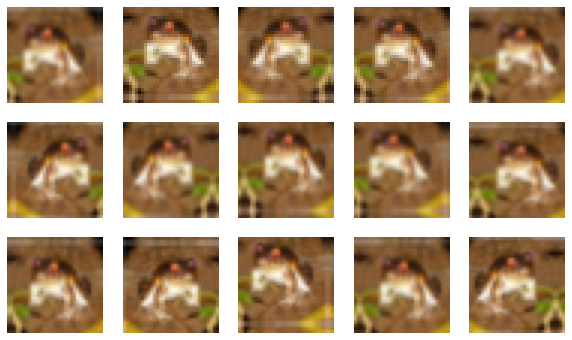

In [20]:
plt.figure(figsize=(10, 6))
i = 0
for j in range(15):
  img = data_augmentation(x_train[[i]])[0].numpy()
  plt.subplot(3, 5, j+1)
  plt.imshow(img.astype('uint8'))
  plt.axis('off')

8. Treine o modelo até obter pelo menos 80% de acurácia de validação. Note que será preciso um número elevado de épocas (100 ou mais), o que deve levar vários minutos.

#### Dicas
- Certifique-se de usar uma taxa de aprendizado apropriada ao longo de todo o treinamento. Por exemplo:
 - Treine por N épocas com taxa constante, observe os resultados, depois continue o treinamento por mais N épocas, etc. Se em algum ponto o desempenho não estiver melhorando, reduza manualmente a taxa de aprendizado;
 - Utilize uma *callback* de decaimento, como [`ReduceLROnPlateau`](https://keras.io/api/callbacks/reduce_lr_on_plateau/) ou a genérica [`LearningRateScheduler`](https://keras.io/api/callbacks/learning_rate_scheduler/); ou
 - Utilize um valor pequeno constante e tenha bastante paciência.

-  Fique à vontade para aprimorar o modelo se desejar. Para facilitar, você pode se basear em quaisquer outras referências ou tutoriais disponíveis, como por exemplo: [Tutorial 1](https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras) ou [Tutorial 2](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification). Note que alguns tutoriais estão desatualizados; por exemplo, a função `fit_generator` tornou-se obsoleta, tendo sido incorporada à função `fit`. No entanto, esteja ciente de que não é necessário um modelo muito complexo para obter a acurácia desejada.

# ~~ Resposta - Exercício 8.1.8 --

In [21]:
def make_model7():
  np.random.seed(42)
  model = Sequential(
      [
       Input(shape=(32, 32, 3)),
       data_augmentation,
   
       layers.experimental.preprocessing.Rescaling(1.0/255),

       layers.Conv2D(256,kernel_size=(5,5),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Conv2D(64,kernel_size=(5,5),activation = 'relu', padding = 'same'),
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,
       
       layers.Conv2D(128,kernel_size=(5,5),activation = 'relu', padding = 'same'), ##add depois
       layers.BatchNormalization(),
       layers.MaxPooling2D(pool_size=(2,2)) ,

       layers.Flatten(),

       layers.Dense(128,activation = 'relu'),
       layers.BatchNormalization(),
       layers.Dropout(0.4),
      
       layers.Dense(10, activation='softmax'),
      ]
  )
  return model
make_model7().summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data_augmentation (Sequentia (None, 32, 32, 3)         0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 256)       19456     
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 256)       1024      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        409664    
_________________________________________________________________
batch_normalization_21 (Batc (None, 16, 16, 64)       

In [27]:
import tensorflow.keras.backend as K
import random

def reset_seed():
   np.random.seed(1)
   random.seed(2)
   tf.random.set_seed(3)


In [30]:
# -------------- 8.1.7

#Ensure Reproducibility
model_7=1
del model
K.clear_session()
reset_seed()

#---- Treinando modelo  7 ----
model_7= make_model7()

opt = tf.keras.optimizers.Adam(learning_rate=0.00008)
  
#Compila o modelo
model_7.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

history = model_7.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=28,batch_size=64)

Epoch 1/28
704/704 [==============================] - 12s 15ms/step - loss: 2.2203 - accuracy: 0.3035 - val_loss: 1.4664 - val_accuracy: 0.4906
Epoch 2/28
704/704 [==============================] - 10s 15ms/step - loss: 1.5984 - accuracy: 0.4556 - val_loss: 1.4809 - val_accuracy: 0.5212
Epoch 3/28
704/704 [==============================] - 10s 15ms/step - loss: 1.3913 - accuracy: 0.5269 - val_loss: 1.1648 - val_accuracy: 0.6096
Epoch 4/28
704/704 [==============================] - 10s 15ms/step - loss: 1.2471 - accuracy: 0.5650 - val_loss: 1.1177 - val_accuracy: 0.6066
Epoch 5/28
704/704 [==============================] - 10s 15ms/step - loss: 1.1804 - accuracy: 0.5901 - val_loss: 1.2308 - val_accuracy: 0.5762
Epoch 6/28
704/704 [==============================] - 10s 15ms/step - loss: 1.0956 - accuracy: 0.6171 - val_loss: 0.8889 - val_accuracy: 0.6920
Epoch 7/28
704/704 [==============================] - 10s 15ms/step - loss: 1.0258 - accuracy: 0.6419 - val_loss: 1.2232 - val_accuracy:

# 2. Usando uma rede pré-treinada (*transfer learning & fine-tuning*)

1. Partindo de alguma [rede pré-treinada](https://keras.io/applications/)  fornecida pelo Keras, treine uma rede convolucional para [classificação entre gatos e cachorros](https://www.kaggle.com/c/dogs-vs-cats). Para isto, siga este [tutorial](https://keras.io/guides/transfer_learning) (provavelmente o mais atualizado no momento e escrito pelo próprio criador do Keras). Antes de seguir o tutorial, provavelmente será útil conhecer os conceitos básicos da [API funcional](https://keras.io/guides/functional_api/) do Keras.
1. (OPCIONAL) Experimente outros modelos pré-treinados e/ou outros conjuntos de dados. O [tutorial específico sobre EfficientNet](https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/) pode ser interessante.
1. (OPCIONAL) Se desejar, você pode aplicar um modelo pré-treinado para classificaro CIFAR-10. No entanto, para obter um desempenho satisfatório nesse caso, será necessário previamente alargar (*resize*) as imagens para um tamanho mais próximo do das imagens da ImageNet (`224 x 224`), para que os filtros treinados possam ser relevantes. Por outro lado, um alargamento excessivo pode introduzir distorções (*artifacts*) que podem prejudicar o desempenho.

#### Dicas
- Antes de aplicar um modelo pré-treinado, geralmente é necessário realizar algum pré-processamento exigido pelo modelo. Ao invés de realizar esse pré-processamento manualmente, como feito no tutorial, é suficiente e mais conveniente utilizar a função `preprocess_input`, disponível no módulo de cada modelo pré-treinado. Por exemplo:
```python
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
base_model = ResNet50V2(include_top=False, input_shape=(150, 150, 3), pooling='avg')
base_model.trainable = False
(...)
x = preprocess_input(x)
x = base_model(x, training=False)
(...)
```
- Para inspecionar as camadas do modelo pré-treinado, utilize `base_model.summary()`
- Antes de utilizar um modelo com a opção `include_top=False`, é útil inspecionar o modelo completo (com a opção `include_top=True`), uma vez que será necessário recriar (e retreinar) as camadas finais removidas.
- Outras referências interessantes (embora mais antigas): [Tutorial 3](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/) e [Tutorial 4](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)

# ~~ Resposta - Exercício 8.2.1 --

In [1]:
import numpy as np

from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input

base_model = NASNetMobile(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet",
    pooling="max")

base_model.trainable = False #Freeze base model

19996672/19993432 [==============================] - 14s 1us/step


In [4]:
#Carrega o dataset
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds,validation_ds,test_ds = tfds.load(
    "cats_vs_dogs",
    #20% val | 20% test
    split = ["train[:60%]","train[60%:80%]","train[80%:100%]"],
    as_supervised = True #inclui rótulos
)

print("Train size: %d"% train_ds.reduce(np.int64(0),lambda x,_ :x+1))
print("Val size: %d"% validation_ds.reduce(np.int64(0),lambda x,_ :x+1))
print("Test size: %d"% test_ds.reduce(np.int64(0),lambda x,_ :x+1))


Dataset cats_vs_dogs downloaded and prepared to C:\Users\fvhma\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.
Train size: 13957
Val size: 4653
Test size: 4652


In [5]:
import tensorflow as tf

size = (224,224)

train_ds = train_ds.map(lambda x,y: (tf.image.resize(x,size),y))
validation_ds = validation_ds.map(lambda x,y: (tf.image.resize(x,size),y))
test_ds = test_ds.map(lambda x,y: (tf.image.resize(x,size),y))

In [6]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [7]:
from tensorflow.keras import Sequential,layers
data_augmentation2 = Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.1)
    ],
    name='data_augmentation',
)

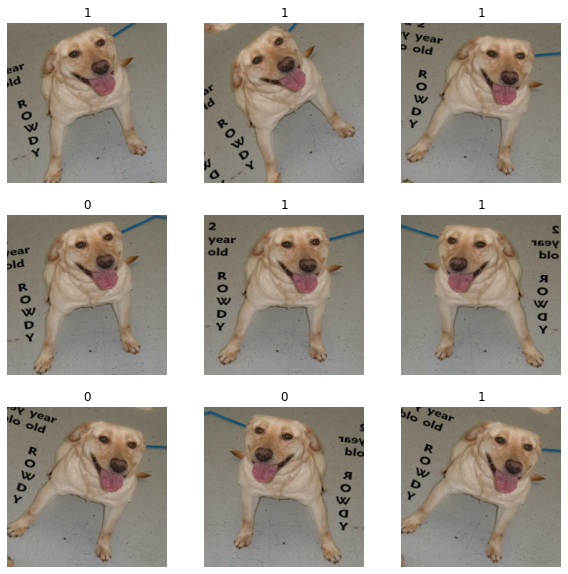

In [8]:
import matplotlib.pyplot as plt


for images, labels in train_ds.take(1):
  plt.figure(figsize=(10,10))
  image19 = images[19]
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    augmented_image = data_augmentation2(tf.expand_dims(image19,0),training = True)
    plt.imshow(augmented_image[0].numpy().astype("int32"))
    plt.title(int(labels[i]))
    plt.axis("off")

In [9]:
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentation2(inputs)

x = preprocess_input(x)

x = base_model(x,training=False)
outputs = layers.Dense(1)(x)
model = tf.keras.Model(inputs,outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
NASNet (Functional)          (None, 1056)              4269716   
_________________________________________________________________
dense (Dense)                (None, 1)                 1057      
Total params: 4,270,773
Trainable params: 1,057
Non-trainable params: 4,269,716
_______________________________________________

In [10]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

mc=ModelCheckpoint('best_model.h5',monitor='val_binary_accuracy',
                   mode='max',verbose=0,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=5,min_lr=0.0001)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(train_ds,epochs=20,callbacks=[mc,reduce_lr],validation_data=validation_ds)

Epoch 1/20
437/437 [==============================] - 4294s 10s/step - loss: 0.2482 - binary_accuracy: 0.9080 - val_loss: 0.0452 - val_binary_accuracy: 0.9875
Epoch 2/20
437/437 [==============================] - 8998s 21s/step - loss: 0.0744 - binary_accuracy: 0.9768 - val_loss: 0.0357 - val_binary_accuracy: 0.9905
Epoch 3/20
437/437 [==============================] - 991s 2s/step - loss: 0.0625 - binary_accuracy: 0.9794 - val_loss: 0.0673 - val_binary_accuracy: 0.9839
Epoch 4/20
437/437 [==============================] - 921s 2s/step - loss: 0.0641 - binary_accuracy: 0.9795 - val_loss: 0.0422 - val_binary_accuracy: 0.9890
Epoch 5/20
437/437 [==============================] - 913s 2s/step - loss: 0.0625 - binary_accuracy: 0.9803 - val_loss: 0.0465 - val_binary_accuracy: 0.9890
Epoch 6/20
437/437 [==============================] - 1781s 4s/step - loss: 0.0603 - binary_accuracy: 0.9792 - val_loss: 0.0289 - val_binary_accuracy: 0.9914
Epoch 7/20
437/437 [==============================] -

In [12]:
base_model.trainable = True
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.fit(train_ds,epochs=10,validation_data=validation_ds)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
NASNet (Functional)          (None, 1056)              4269716   
_________________________________________________________________
dense (Dense)                (None, 1)                 1057      
Total params: 4,270,773
Trainable params: 4,234,035
Non-trainable params: 36,738
______________________________________________

# 3. (OPCIONAL) Visualizando os padrões aprendidos

1. (OPCIONAL) Para alguma rede convolucional à sua escolha, visualize o que cada camada da rede "aprendeu"; mais precisamente, mostre exemplos de imagens de entrada que maximizam a ativação dos filtros em cada camada. Para isso, siga este [tutorial](https://keras.io/examples/vision/visualizing_what_convnets_learn/).